In [92]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [93]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [94]:
df = pd.read_csv("../Cpp/Output/SinStat.txt", sep='\t')
df.head()

,NoiseType,Noise,X,Sin,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3
0,Gaussian,1.000000e-17,-3.14159,-1.224610e-16,0.000000,0.00000,0.00000,0.000000e+00,9.999920e-18,0.000000e+00,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,Uniform,1.000000e-17,-3.14159,-1.224610e-16,0.000000,0.00000,0.00000,0.000000e+00,9.999920e-18,0.000000e+00,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,Gaussian,1.000000e-16,-3.14159,-1.224610e-16,0.717489,-4.44093,4.44093,7.174840e-17,9.999920e-17,-4.440890e-20,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,Uniform,1.000000e-16,-3.14159,-1.224610e-16,0.000000,0.00000,0.00000,0.000000e+00,9.999920e-17,0.000000e+00,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Gaussian,1.000000e-15,-3.14159,-1.224610e-16,1.007400,-3.55274,3.55274,1.007400e-15,9.999920e-16,7.949200e-18,...,0.0,0.074483,0.0,0.037342,0.0,0.016864,0.0,0.005621,0.0,0.0


In [95]:
sorted(df['Noise'].unique())

[1e-17,
 1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 0.2]

In [96]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [97]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m']):
    fig, ax = plt.subplots()
    ax.set_title('sin(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

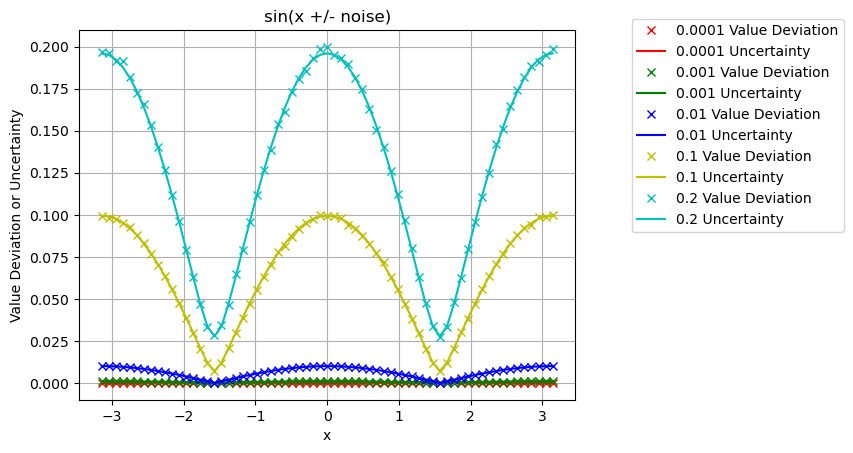

In [98]:
PlotValues()

In [99]:
def PlotErrorDev( noiseType='Gaussian', sNoise=(0.5, 1e-1, 1e-2, 1e-3, 1e-4),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise:.0e} Error Deviation')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise:.0e} Value Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

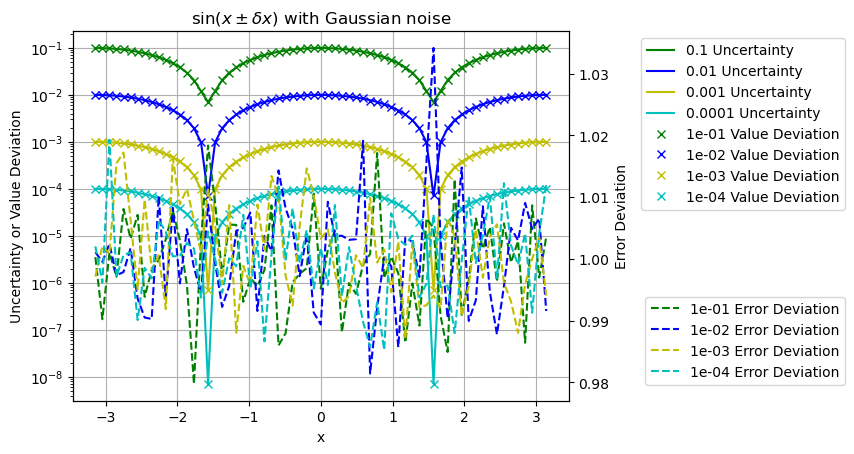

In [100]:
PlotErrorDev()

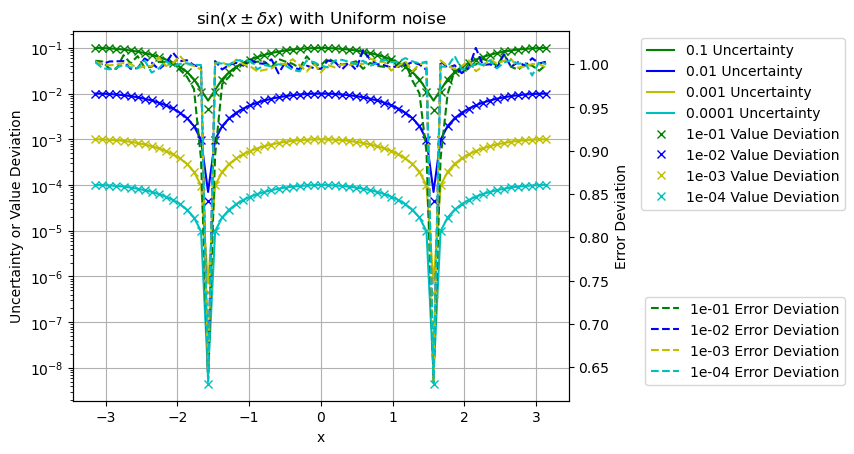

In [101]:
PlotErrorDev('Uniform')

In [102]:
def PlotErrorDev( noiseType='Gaussian', sNoiseStyleMarker=[(0.2,'-','<'), (1e-1,'-.','>'), (1e-2,':','^'), (1e-3,'--','v')],
                  ylim=(1e-6, 1e1) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.grid(True)
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], f'k{style}', label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], f'k{marker}', label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], c='gray', ls=style, label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.58, 0.5))
    ax2.legend(bbox_to_anchor=(1.15, 0.9))

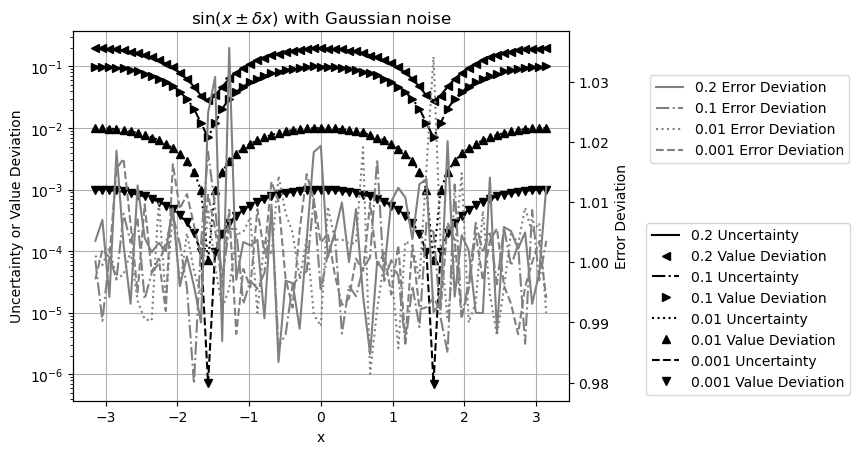

In [103]:
PlotErrorDev()

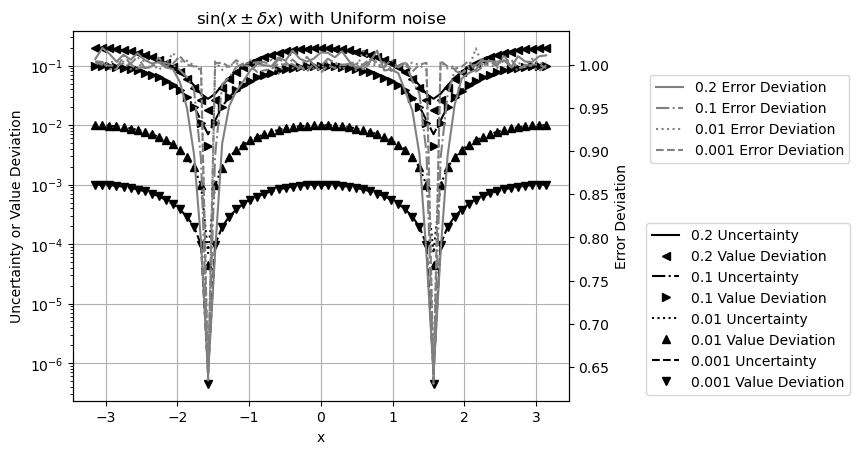

In [104]:
PlotErrorDev('Uniform')

# Mean vs Bias

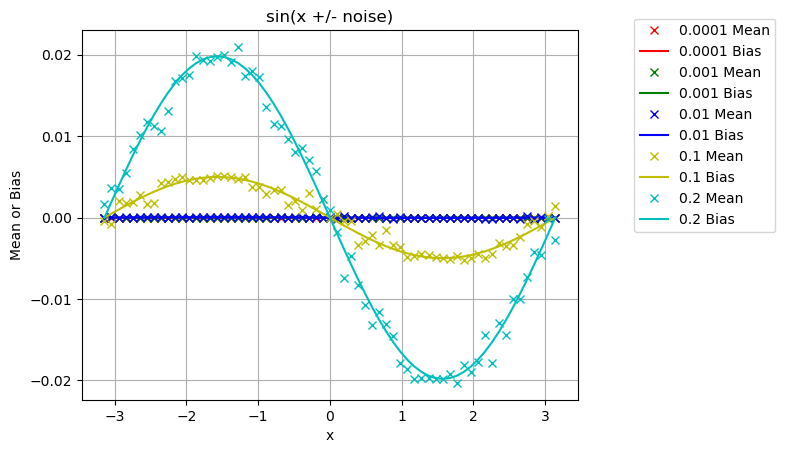

In [105]:
PlotValues(sValue=['Mean', 'Bias'])

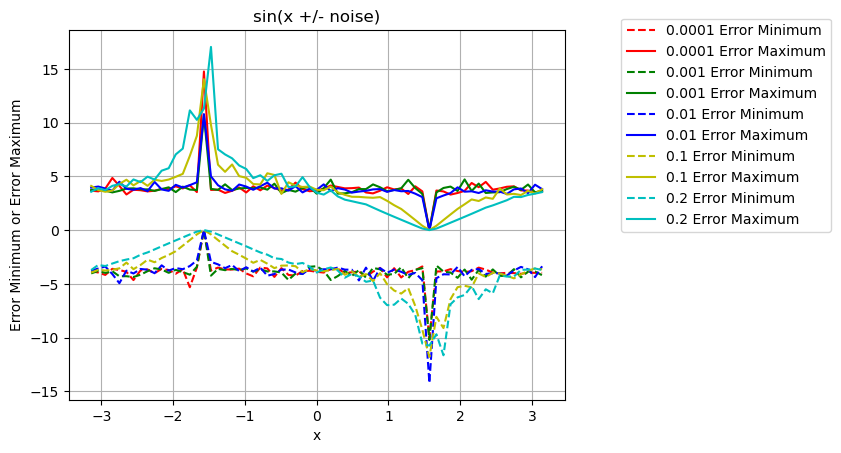

In [106]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'])

# vs Noise vs X

In [107]:
def PlotSurface(value, noiseType, cmap=None):
    logz = (value == 'Uncertainty')
    dfOrderVsNoise = df[(df['NoiseType']==noiseType) & (df['Noise']!=0)]\
                .pivot(index='Noise', columns='X', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=cmap if cmap else plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    
    ax.set_xlabel('X')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 4)]
    ax.set_xticks(sXTick, [f'{x:.3}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

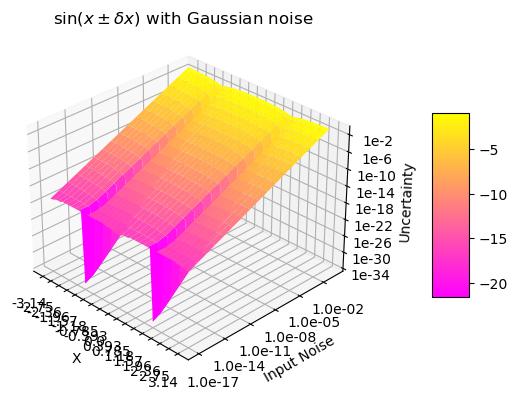

In [108]:
PlotSurface('Uncertainty', 'Gaussian')

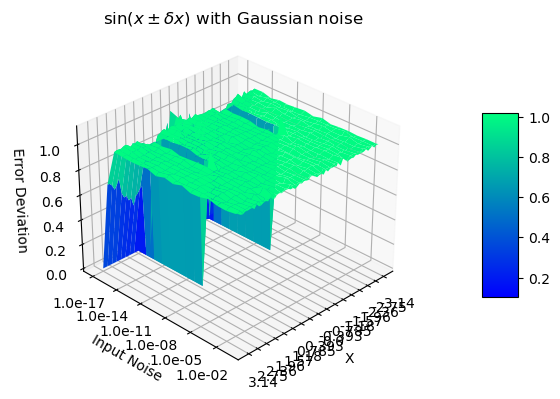

In [109]:
PlotSurface('Error Deviation', 'Gaussian')

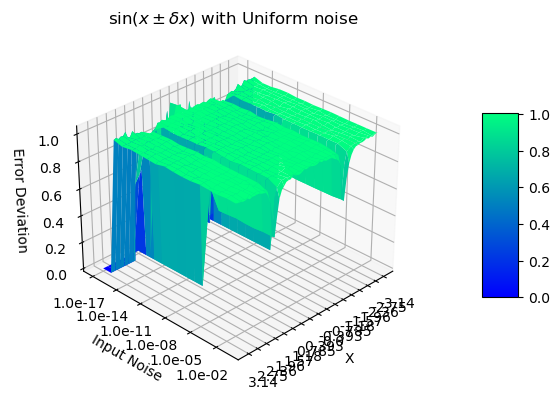

In [110]:
PlotSurface('Error Deviation', 'Uniform')

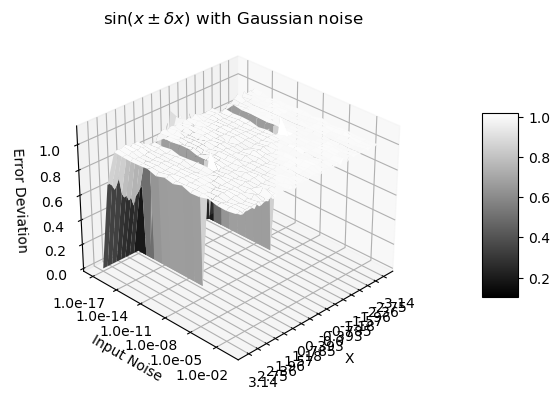

In [111]:
PlotSurface('Error Deviation', 'Gaussian', cmap=plt.cm.gray)

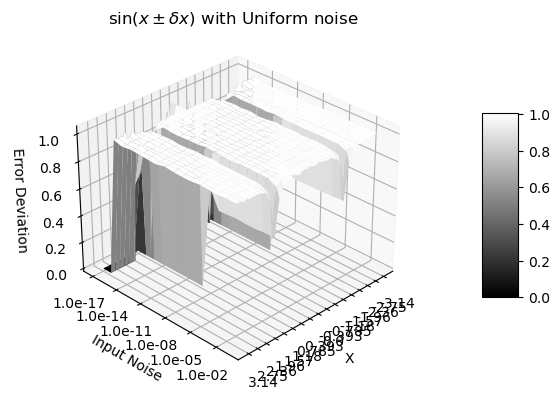

In [112]:
PlotSurface('Error Deviation', 'Uniform', cmap=plt.cm.gray)

In [113]:
df[(df['NoiseType']=='Gaussian') & (df['Noise']>=1e-15) & 
   ((np.abs(df['X'])<(math.pi/2-1e-15)) | (np.abs(df['X'])>(math.pi/2+1e-15)))]['Error Deviation'].describe()

count    1040.000000
mean        0.986218
std         0.115897
min         0.000000
25%         0.994529
50%         0.999923
75%         1.005103
max         1.121110
Name: Error Deviation, dtype: float64

In [114]:
df[(df['NoiseType']=='Uniform') & (df['Noise']>=1e-15) & 
   ((np.abs(df['X'])<(math.pi/2-1e-15)) | (np.abs(df['X'])>(math.pi/2+1e-15)))]['Error Deviation'].describe()

count    1040.000000
mean        0.978088
std         0.124446
min         0.000000
25%         0.995924
50%         0.999655
75%         1.003032
max         1.035740
Name: Error Deviation, dtype: float64

# Histogram

In [115]:
df.rename(columns={'-3':'-3.0', '-2':'-2.0', '-1':'-1.0', '0':'0.0', '1':'1.0', '2':'2.0', '3':'3.0'}, inplace=True)

In [116]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.003313,0.0,0.016864,0.0,0.035535,0.0,0.074784,0.0,...,0.0,0.074483,0.0,0.037342,0.0,0.016864,0.0,0.005621,0.0,0.0


In [117]:
def PlotHisto( noiseType='Gaussian', sNoise=(1e-6, 1e-16), sX=(0, math.pi/4, math.pi/2), 
               style=['gx','c-', 'b--', 'g-', 'c--', 'b-']):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    ax = dfPlot[sHisto].T.plot(style=style, grid=True, xlabel='Normalized Error', ylabel='Normalized Count',
                              title=r'Histogram for Normalized Error of $\sin(x + \delta x)$')
    ax.legend(bbox_to_anchor=(1, 1))    


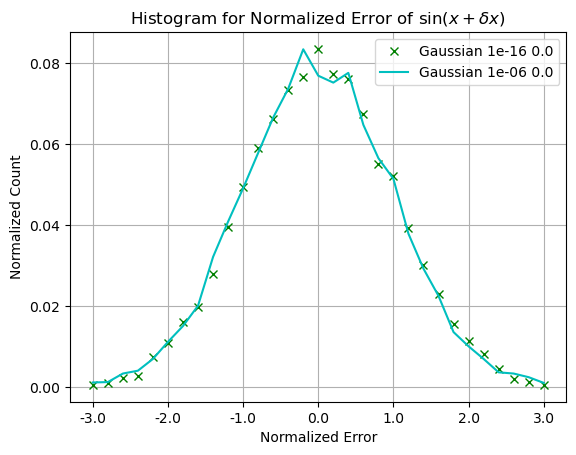

In [118]:
PlotHisto()

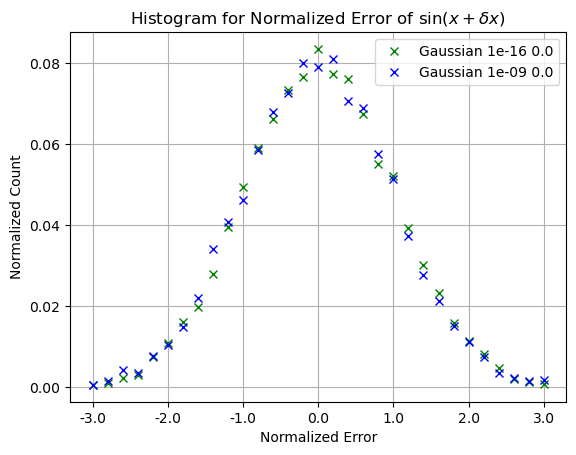

In [119]:
PlotHisto(sNoise=(1e-9, 1e-16), sX=(0, math.pi/2), style=['gx','bx', 'g--', 'b-'])

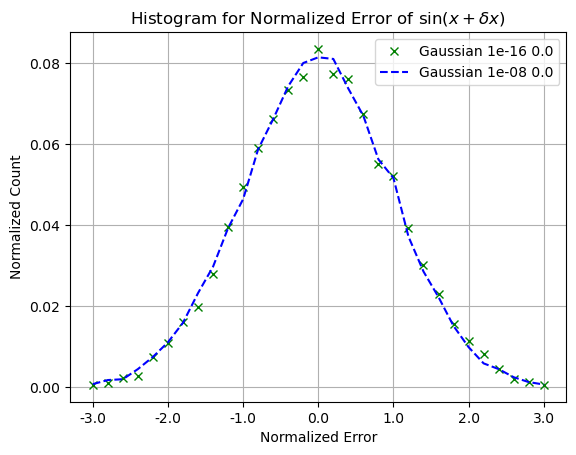

In [120]:
PlotHisto(sNoise=(1e-8, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

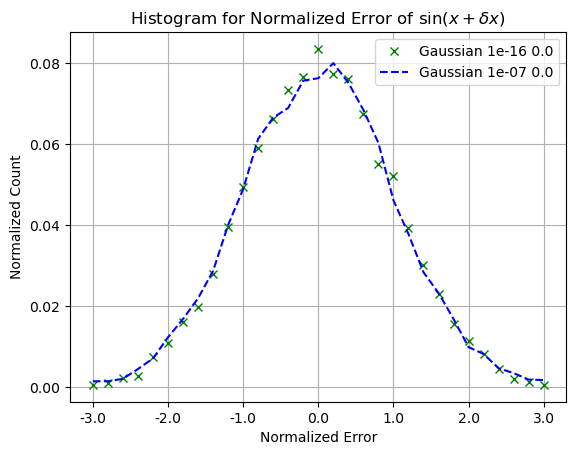

In [121]:
PlotHisto(sNoise=(1e-7, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

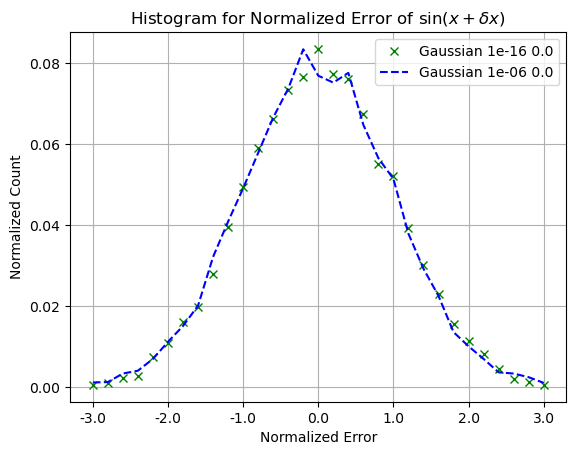

In [122]:
PlotHisto(sNoise=(1e-6, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

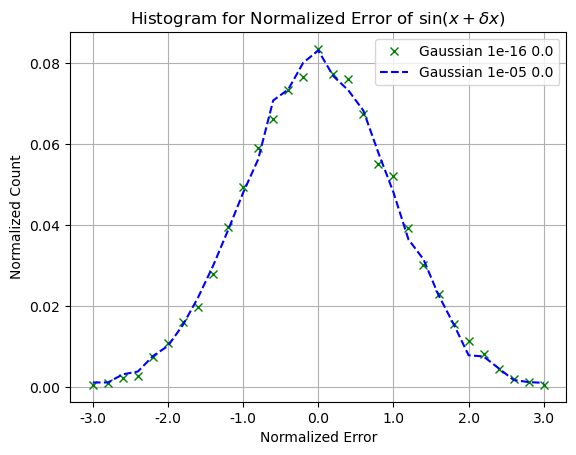

In [123]:
PlotHisto(sNoise=(1e-5, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

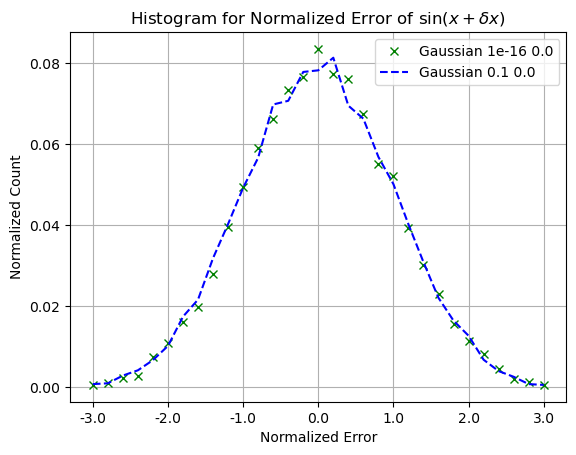

In [124]:
PlotHisto(sNoise=(1e-1, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

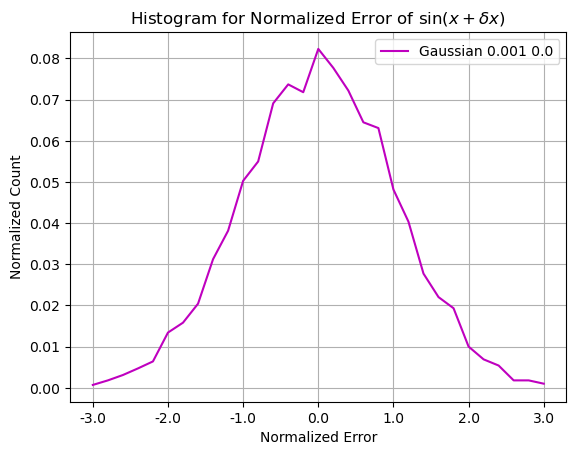

In [125]:
PlotHisto(sNoise=(1e-3,), sX=(0, -math.pi/2, math.pi/2, math.pi/4), style=['m-', 'c-', 'bx', 'g-'])

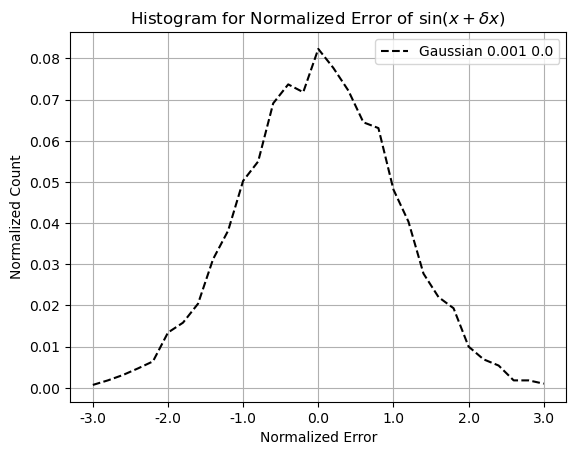

In [126]:
PlotHisto(sNoise=(1e-3,), sX=(0, -math.pi/2, math.pi/2, math.pi/4), style=['k--', 'k:', 'kx', 'k-'])